In [1]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!ls ./Data

Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [2]:
from ols_diag import ols_diag
# ols_diag(df,X,model, nlag=1, remove_outliers=False):


### 5.       The file Cardata.xlsx provides the following information for 392 different car models:
 
        ■ Cylinders
 
        ■ Displacement
 
        ■ Horsepower
 
        ■ Weight
 
        ■ Acceleration
 
        ■ Miles per gallon (MPG)
 
 Determine an equation that can predict MPG. Why do you think all the independent variables are not significant?
 


In [3]:
car=pd.read_excel("./Data/Cardata.xlsx")
car.head()

,cyl,disp,HP,wt,accel,mpg
0,8,304.0,193,4732,18.5,9.0
1,8,307.0,200,4376,15.0,10.0
2,8,360.0,215,4615,14.0,10.0
3,8,400.0,150,4997,14.0,11.0
4,8,350.0,180,3664,11.0,11.0


In [4]:
car.columns

Index(['cyl', 'disp', 'HP', 'wt', 'accel', 'mpg'], dtype='object')

In [5]:
y_5=car[["mpg"]]
X_5=car[['cyl', 'disp', 'HP', 'wt', 'accel']]

#### Iteration 1: OLS Modeling

In [6]:
X_5=sm.add_constant(X_5)
model_5=sm.OLS(y_5,X_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          9.82e-101
Time:                        03:52:43   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2643      2.669     17.331      0.000      41.016      51.513
cyl           -0.3979      0.411     -0.969      0.333      -1.205       0.409
disp       -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
HP            -0.0453      0.017     -2.716      0.007      -0.078      -0.012
wt            -0.0052      0.001     -6.351      0.000      -0.007      -0.004
accel         -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Iteration 1: OLS Diagnostic test:

Dataset: 	 392
X: 	 392
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Warning
Reason: Residual Not Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Warning
Reason: Data do not have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Warning
Reason: Data do not have have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Warning
Reason: Data are related to themself by:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------

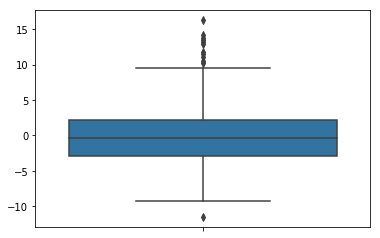

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

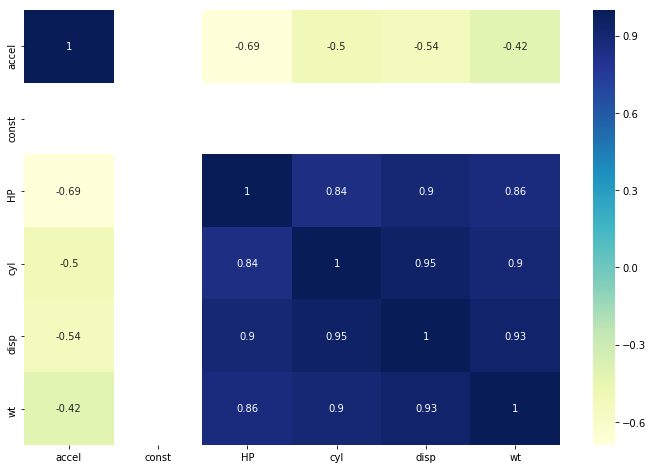

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [7]:
ols_diag(car,X_5,model_5)

#### Iteration 1: Problems conclusion and further actions
* We have breaking each and evry OLS assumtion as can be seen from above results.
* We are follwing problem with this dataset:
1. Residuals are not normally distributed.
2. Thier is no linear relationship in the data
3. Data do not have have same variance accross
4. Data are related to themself by:1 lag
5. We have atleast 40 outliers
6. HP, Cylinder, Displacement  ans Weight are all highly correleated with each other. 

### Method A
#### Even if we remove the outliers the correlation between the terms will remain so we propose follwing action:
1. Remove all 40 outliers
2. Take diffrence of all variables with lag of itslef using Cochrane-Orcutt rho value of 1 as we have the one obtained using Cochrane-Orcutt is of no help in reducing  autocrenaltion procedure and rerun OLS (Warning we are transforming variabl).
3. Rerun regression
$$ y_{t}-\rho y_{{t-1}}=\alpha (1-\rho )+\beta (X_{t}-\rho X_{{t-1}})+e_{t}.\,
$$

In [8]:
rows_to_remove=[13, 53, 54, 55, 107, 108, 113, 117, 131, 132, 138, 151, 152, 153, 171, 172, 183, 196, 212, 242, 259, 311, 337, 358, 365, 369, 372, 374, 376, 379, 381, 383, 384, 385, 386, 387, 388, 389, 390, 391]

In [9]:
car=car.drop(car.index[rows_to_remove])
X_5=car[['cyl', 'disp', 'HP', 'wt', 'accel']]
y_5=car[['mpg']]
X_5=sm.add_constant(X_5)
model_5=sm.OLS(y_5, X_5).fit()

In [10]:
ch_y=model_5.resid
ch_X=model_5.resid

## Shift X by 1
ch_X=ch_X.shift(periods=1, freq=None, axis=0)

## Remoce top row of X and y
ch_X=ch_X[1:]
ch_y=ch_y[1:]

## Remove bottom row of X
print(len(ch_X))
print(len(ch_X))

351
351


In [11]:
model_ch=sm.OLS(ch_y, ch_X).fit()
model_ch.params

x1    0.602161
dtype: float64

In [12]:
rho=model_ch.params["x1"]
rho=1
car_rho=car*rho
car_rho=car_rho.shift(periods=1,axis=0).fillna(0)
car_rho=car_rho[:-1]
car_rho
car_b=car.subtract(car_rho)
car_b=car_b.fillna(0)
car_b.head()
car_b=car_b.round(decimals=2)
car_b.head()

,cyl,disp,HP,wt,accel,mpg
0,8.0,304.0,193.0,4732.0,18.5,9.0
1,0.0,3.0,7.0,-356.0,-3.5,1.0
2,0.0,53.0,15.0,239.0,-1.0,0.0
3,0.0,40.0,-65.0,382.0,0.0,1.0
4,0.0,-50.0,30.0,-1333.0,-3.0,0.0


In [13]:
car_b.columns

Index(['cyl', 'disp', 'HP', 'wt', 'accel', 'mpg'], dtype='object')

#### Iteration 2: OLS Modeling

In [14]:
X_5b=car_b[['cyl', 'disp', 'HP', 'wt', 'accel']]
y_5b=car_b[['mpg']]
X_5b=sm.add_constant(X_5b)
model_5b=sm.OLS(y_5b, X_5b).fit()
model_5b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     44.11
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.77e-35
Time:                        03:52:43   Log-Likelihood:                -172.49
No. Observations:                 352   AIC:                             357.0
Df Residuals:                     346   BIC:                             380.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1009      0.021      4.752      0.000       0.059       0.143
cyl            0.1899      0.033      5.768      0.000       0.125       0.255
disp          -0.0038      0.001     -5.125      0.000      -0.005      -0.002
HP             0.0068      0.001      5.328      0.000       0.004       0.009
wt             0.0002   6.87e-05      3.297      0.001    9.14e-05       0.000
accel          0.0691      0.009      7.685      0.000       0.051       0.087
==============================================================================
Omnibus:                      445.867   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63458.061
Skew:                           5.673   Prob(JB):                         0.00
Kurtosis:                      67.792   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Iteration 2: OLS Diagnostic 

Dataset: 	 352
X: 	 352
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Warning
Reason: Residual Not Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Warning
Reason: Data do not have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Warning
Reason: Data do not have have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-------------------------

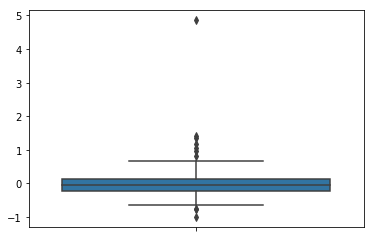

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

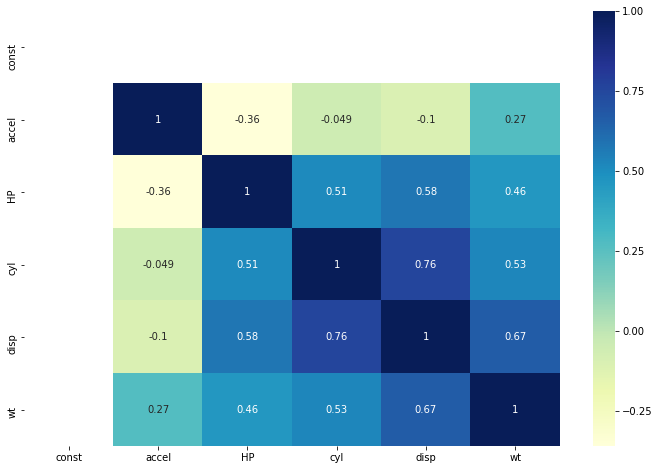

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [15]:
ols_diag(car_b,X_5b,model_5b)

#### Iteration 2: Conclusion

1. Even after removing autliers and taking Cochrane and self diffrenceing we are still breaking most of OLS assumtion.

2. So we are stopping at this time to conclude that our model does not have any linear relationship

#### Iteration 3: To-Do

### Method B

#### Even if we remove the outliers the correlation between the terms will remain so we propose follwing action:
1. Remove all 40 outliers
2. Take log of all varaibles
3. Take diffence of all varibales with its past
4. Average HP, cyl, disp, wt
5. Rerun regression

#### Which basically means we have performed too many surgeriers in data just to make model compatible to OLS, and thus we do not wich to continue any further. and out itertaion 2  is our answer